#Exercise (Master DL)




Conduct the ANN analysis using the boston dataset.

You may include the hyperparameters tuning.




Submit the python notebook and the report in the MS Teams 

In [101]:
from google.colab import drive
drive.mount('/drive')

path = '/drive/MyDrive/apu-dl-datasets/boston.csv'

Drive already mounted at /drive; to attempt to forcibly remount, call drive.mount("/drive", force_remount=True).


In [102]:
# Target = Price, Feature Variable = CRIM - LSTAT columns.

import pandas as pd

data = pd.read_csv(path)
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [103]:
# Remember, split the target variable and feature variables
# X is target variable dataset
# Y is feature variables dataset

Y = data['PRICE']
X = data.drop('PRICE', axis = 1)

In [104]:
# Then split the X,Y datasets into training and testing datasets (Totalling 4 datasets)

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.30, random_state = 0)

# Print the datasets' dimension shapes
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(354, 13) (152, 13) (354,) (152,)


In [105]:
# The feature variables are quite different values, so do normalization.
# Note, if the feature variable are same unit, you don't do normalization.

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()


# Fit transform, same variance and means for training data
# Mean and standard deviation for testing data

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [106]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras import initializers
from keras import regularizers
from keras.callbacks import EarlyStopping



# Initial Model

In [107]:
# Number of neurals. No harm in changing the numbers, no guidelines here.
L1 = 100 # First hidden layer neurons
L2 = 100 # Second hidden layer neurons

# This means parameters in input model. In X_train, there are only 13 feature columns.
input = 13

# Activation functions
activation_function = 'relu'
activation_function2 = 'relu'
output_activation_function = 'linear' # Multi-class = softmax, Binary = sigmoid, continuous = * something linear *

# Number of outputs
# You need to know your columns, for example, you only made a column "Price", so here only one value.
no_of_output = 1

# Initialize object
model = Sequential()

# First hidden layer
model.add(Dense(L1, input_dim=input, activation=activation_function))

# Second hidden layer
model.add(Dense(L2, activation=activation_function2))

# Output layer
model.add(Dense(no_of_output, activation=output_activation_function))

In [108]:
# Configure the loss, metric and optimizers
# Please note that mae, mse, mape are same in lost and metric classes. You can invert and mix using them.
lost_class = 'mse'
metric_class = 'mae'
optimizer_class = 'rmsprop'

model.compile(loss = lost_class, metrics = [metric_class], optimizer = optimizer_class)

In [109]:
# Configure the number of iterations and sample size in each iterations
no_of_epoch = 100
sample_size = 200

history = model.fit(X_train, y_train, epochs = no_of_epoch, batch_size = sample_size, validation_data = (X_test, y_test))

Epoch 1/100
2/2 [==============================] - 1s 431ms/step - loss: 580.7188 - mae: 22.2535 - val_loss: 521.1647 - val_mae: 20.9022
Epoch 2/100
2/2 [==============================] - 0s 61ms/step - loss: 546.6276 - mae: 21.5082 - val_loss: 494.1167 - val_mae: 20.2658
Epoch 3/100
2/2 [==============================] - 0s 54ms/step - loss: 518.3926 - mae: 20.8702 - val_loss: 468.4715 - val_mae: 19.6462
Epoch 4/100
2/2 [==============================] - 0s 65ms/step - loss: 491.1239 - mae: 20.2506 - val_loss: 443.2148 - val_mae: 19.0176
Epoch 5/100
2/2 [==============================] - 0s 98ms/step - loss: 463.9272 - mae: 19.6153 - val_loss: 417.7190 - val_mae: 18.3682
Epoch 6/100
2/2 [==============================] - 0s 105ms/step - loss: 436.1068 - mae: 18.9574 - val_loss: 391.8814 - val_mae: 17.7006
Epoch 7/100
2/2 [==============================] - 0s 108ms/step - loss: 408.6261 - mae: 18.2710 - val_loss: 367.1256 - val_mae: 17.0286
Epoch 8/100
2/2 [============================

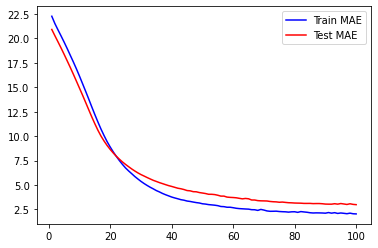

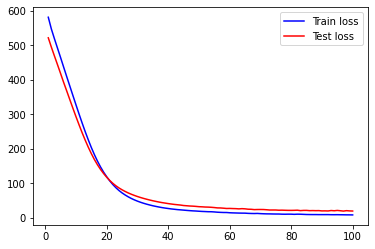

In [110]:
# Bring back the previous code and run. No changes in this part.
# Visualisations

import matplotlib.pyplot as plt

acc2 = history.history['mae']
val_acc = history.history['val_mae']
loss2 = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1,len(acc2)+1)

# 'b' and 'r' are blue and red color

plt.plot(epochs, acc2, 'b', label='Train MAE')
plt.plot(epochs, val_acc, 'r', label='Test MAE')
plt.legend()
plt.figure()

plt.plot(epochs, loss2, 'b', label = 'Train loss')
plt.plot(epochs, val_loss, 'r', label = 'Test loss')
plt.legend()
plt.show()

From the Figure above,

When you do the model with 10 epochs, the graph is quite constantly diverged through out the iterations and moving downwards on both graphs. This indicates that the result is not good, as both errors are not reduced to very litte percentage.

Increase the epoch to 50 times and there are much better result than previous data, as the both training and test lines of MAE and losses are lowered with usual curves and very minimal diverge on both graphs.

Increase the epoch to 100 doesn't see much difference either.

Increase the sample_size to 200, does not see much differnce either.

Increase both L1 and L2 to 200 also does not help, just increasing the processing time without any significant results.

MAE is always within 5% to 2.5% on both train and test datasets.
Loss is alwasys around 20 on both train and test datasets.


In [111]:
import numpy as pd

predict = model.predict(X_test)

print(predict)

5/5 [==============================] - 0s 2ms/step
[[24.730116 ]
 [24.7999   ]
 [25.77821  ]
 [10.824697 ]
 [18.751875 ]
 [19.932278 ]
 [22.864431 ]
 [21.782816 ]
 [18.887234 ]
 [16.75421  ]
 [ 9.946003 ]
 [12.414263 ]
 [14.094504 ]
 [10.782334 ]
 [45.30247  ]
 [34.137096 ]
 [23.767097 ]
 [42.040367 ]
 [31.21559  ]
 [22.102802 ]
 [23.573065 ]
 [21.023115 ]
 [20.306238 ]
 [27.54387  ]
 [23.11082  ]
 [20.848295 ]
 [17.937214 ]
 [16.858503 ]
 [45.037865 ]
 [16.414406 ]
 [15.291124 ]
 [17.767563 ]
 [18.537214 ]
 [19.43764  ]
 [27.752853 ]
 [22.396305 ]
 [ 6.705141 ]
 [29.84825  ]
 [14.511614 ]
 [11.452827 ]
 [26.790764 ]
 [22.247776 ]
 [20.751148 ]
 [17.124332 ]
 [22.673141 ]
 [25.281693 ]
 [19.301485 ]
 [15.8295355]
 [15.8113985]
 [23.135721 ]
 [14.829566 ]
 [17.39721  ]
 [18.833607 ]
 [38.69833  ]
 [11.825549 ]
 [17.444725 ]
 [18.316153 ]
 [18.075766 ]
 [14.74226  ]
 [21.760792 ]
 [21.250319 ]
 [17.717865 ]
 [32.383408 ]
 [30.763725 ]
 [17.503551 ]
 [30.202135 ]
 [15.412817 ]
 [17.22658 

# Note:

What you can always manipulate in ANN, CNN, DNN or other NNs:

Number of epochs
Number of hidden layers
Type of optimizer class
Type of activation function class
Number of neurons
